In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/stupino_locs.csv')
df_interests = pd.read_csv('data/stupino_interests.csv')

In [3]:
df_interests.head()

,marital_status_married,marital_status_not_married,employment_working,employment_not_working,availability_of_education_has_a_higher_education,availability_of_education_no_higher_education,interests_b2b_advertising_and_marketing,interests_b2b_raw_materials,interests_b2b_equipment_machines_energy_supply,interests_b2b_office,...,interests_parents_of_toddlers,interests_parents_of_preschoolers,interests_of_parents_of_primary_school_students,interests_parents_of_middle_and_high_school_students,interests_business_education,age_17,age_55,gender_female,gender_male,id
0,0,1,1,1,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,146343
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,149957
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,78692
3,0,1,1,0,1,1,0,1,0,0,...,1,0,0,0,1,0,1,1,1,99331
4,0,1,1,0,1,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,129854


In [4]:
df['source'].unique()

array([1, 2, 3], dtype=int64)

In [5]:
df_interests['id'].unique().shape

(108058,)

In [6]:
df.head()

,lat,lon,is_weekday,hour,cnt,first_ts,last_ts,log_date,source,dt,id
0,54.8436,38.0920,True,19,1,1675787814,1675787814,2023-02-07,1,2023-02-09,0
1,54.8889,38.0915,True,18,2,1675177612,1675180736,2023-01-31,1,2023-02-02,1
2,54.8889,38.0915,True,0,1,1675029248,1675029248,2023-01-30,1,2023-02-02,1
3,54.8435,38.1928,True,6,2,1676951940,1676951941,2023-02-21,2,2023-02-21,2
4,54.8435,38.1928,True,22,3,1674846483,1674849498,2023-01-27,1,2023-02-02,2


In [7]:
grouped_by_id = df.groupby('id').count()

In [9]:
grouped_by_id['dt'].shape

(151891,)

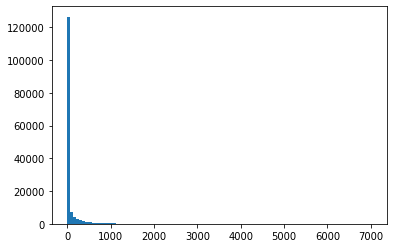

In [10]:
plt.hist(grouped_by_id['dt'], bins=100);

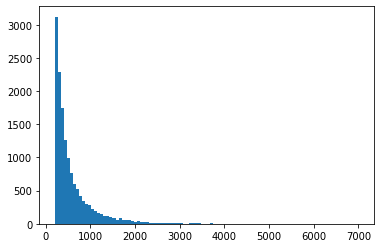

In [7]:
plt.hist(grouped_by_id['dt'][grouped_by_id['dt'] > 200], bins=100);

(0.0, 500.0)

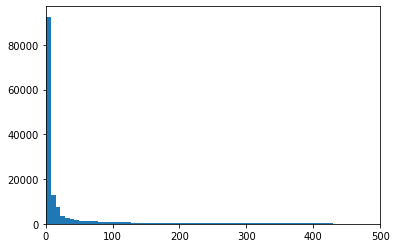

In [27]:
plt.hist(grouped_by_id['dt'], bins=1000);
plt.xlim(0, 500)

In [12]:
grouped_by_id['dt'][grouped_by_id['dt'] > 1]

id
0          910
1          781
2         1358
3          396
4          349
          ... 
150762       2
150800       2
150816       2
151080       2
151414       2
Name: dt, Length: 102398, dtype: int64

In [28]:
sorted_by_ts = df.sort_values(['first_ts', 'last_ts']).reset_index()[['first_ts', 'last_ts', 'id']]

In [14]:
sorted_by_ts['interval'] = sorted_by_ts['last_ts'] - sorted_by_ts['first_ts']

In [15]:
sorted_by_ts.head()

,first_ts,last_ts,id,interval
0,1674766800,1674768118,2193,1318
1,1674766800,1674768677,46349,1877
2,1674766800,1674768871,7368,2071
3,1674766801,1674766802,20067,1
4,1674766802,1674767063,6353,261


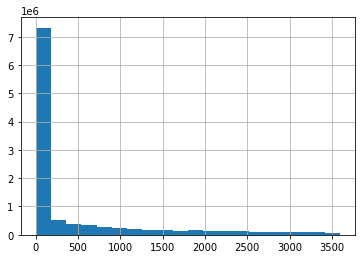

In [16]:
sorted_by_ts['interval'].hist(bins=20);

In [17]:
users = df['id'].unique()

In [29]:
users.shape

(151891,)

In [30]:
sorted_by_ts['intersection'] = False
for user in users:
    user_data = sorted_by_ts[sorted_by_ts['id'] == user]
    res = user_data['last_ts'].values - user_data['first_ts'].shift(-1).values
    sorted_by_ts.loc[user_data.index, 'intersection'] = res    



In [31]:
sorted_by_ts.fillna(0, inplace=True)

In [32]:
sorted_by_ts['intersection_flag'] = sorted_by_ts['intersection'] > 0

In [33]:
sorted_by_ts

,first_ts,last_ts,id,intersection,intersection_flag
0,1674766800,1674768118,2193,-2958.0,False
1,1674766800,1674768677,46349,590.0,True
2,1674766800,1674768871,7368,-26752.0,False
3,1674766801,1674766802,20067,-26719.0,False
4,1674766802,1674767063,6353,255.0,True
...,...,...,...,...,...
10880137,1677617992,1677617994,33385,0.0,False
10880138,1677617994,1677617994,28821,0.0,False
10880139,1677617995,1677617996,4751,0.0,False
10880140,1677617997,1677617997,1268,0.0,False


In [47]:
sorted_by_ts[(sorted_by_ts['id'] == 0) & (sorted_by_ts['intersection'] > 0)]['intersection_flag'].sum()

151

In [48]:
sorted_by_ts.to_csv('sorted_by_ts.csv')

In [49]:
test = pd.read_csv('sorted_by_ts.csv')

## Карта

In [39]:
import osmnx as ox
import branca.colormap as cm
import folium
from folium import plugins
import numpy as np

import networkx as nx
from shapely import wkt

from folium import PolyLine, Map, plugins, Marker
import random
from utils import City


In [9]:
df.head()

,lat,lon,is_weekday,hour,cnt,first_ts,last_ts,log_date,source,dt,id
0,54.8436,38.0920,True,19,1,1675787814,1675787814,2023-02-07,1,2023-02-09,0
1,54.8889,38.0915,True,18,2,1675177612,1675180736,2023-01-31,1,2023-02-02,1
2,54.8889,38.0915,True,0,1,1675029248,1675029248,2023-01-30,1,2023-02-02,1
3,54.8435,38.1928,True,6,2,1676951940,1676951941,2023-02-21,2,2023-02-21,2
4,54.8435,38.1928,True,22,3,1674846483,1674849498,2023-01-27,1,2023-02-02,2


In [10]:
city_center = df[['lat', 'lon']].mean()

In [11]:
city_center

lat    54.885288
lon    38.087027
dtype: float64

In [35]:
latlon = [city_center.lat, city_center.lon]
zoom = 14

In [43]:
basic_map = City()
basic_map.attach_map(
    location=latlon,
    zoom_start=zoom,
    tiles='cartodbpositron',
    control_scale=True,
    prefer_canvas=True,
    )

In [44]:
basic_map.map

In [ ]:
basic_map